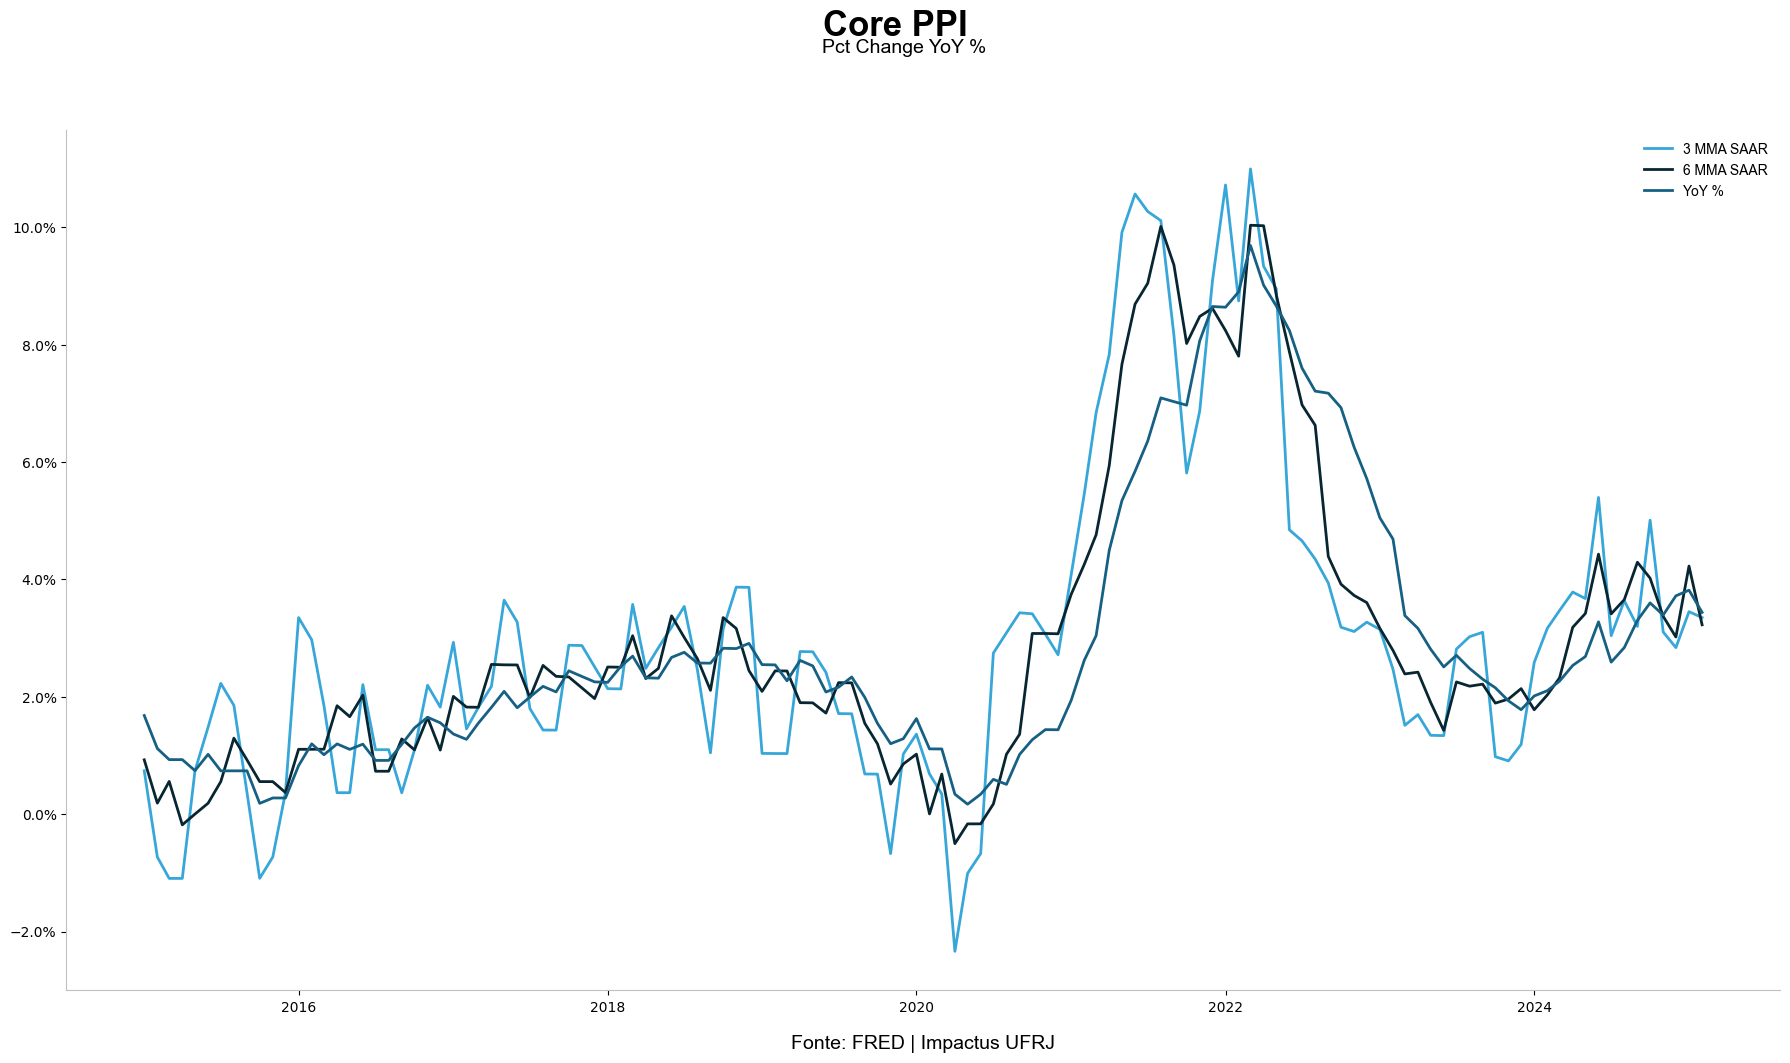

,Nível de Preços,MoM %,YoY %,3 MMA SAAR,6 MMA SAAR
2015-01-01,108.900,0.000000,0.016807,0.007385,0.009261
2015-02-01,108.500,-0.003673,0.011184,-0.007308,0.001877
2015-03-01,108.600,0.000922,0.009294,-0.010950,0.005578
2015-04-01,108.600,0.000000,0.009294,-0.010950,-0.001821
2015-05-01,108.700,0.000921,0.007414,0.007395,0.000019
...,...,...,...,...,...
2024-10-01,144.897,0.003609,0.036000,0.050099,0.040217
2024-11-01,144.858,-0.000269,0.033932,0.031042,0.033708
2024-12-01,145.389,0.003666,0.037204,0.028383,0.030187
2025-01-01,146.130,0.005097,0.038172,0.034507,0.042276


In [1]:
import pandas as pd
from fredapi import Fred
import matplotlib.pyplot as plt
from matplotlib import font_manager as fm
import matplotlib.ticker as mtick

fred = Fred(api_key="672d5598c8a41df9397cc5eb92c02d5e")

pi = fred.get_series("PPIFES")
ppi = pd.DataFrame()
ppi["Nível de Preços"] = pi
ppi["MoM %"] = ppi["Nível de Preços"].pct_change()
ppi["YoY %"] = ppi["Nível de Preços"].pct_change(periods=12)
ppi["3 MMA SAAR"] = (1 + ppi["MoM %"].rolling(window=3).mean())**12 - 1 
ppi["6 MMA SAAR"] = (1 + ppi["MoM %"].rolling(window=6).mean())**12 - 1

ppi = ppi.loc["2015":]

font_path = "Montserrat-Regular.ttf"
font_prop = "Arial"

plt.figure(figsize=(18, 10.8))

plt.plot(ppi.index, ppi["3 MMA SAAR"], linewidth=2, color="#37A6D9", label="3 MMA SAAR")
plt.plot(ppi.index, ppi["6 MMA SAAR"], linewidth=2, color="#082631", label="6 MMA SAAR")
plt.plot(ppi.index, ppi["YoY %"], linewidth=2, color="#166083", label="YoY %")

plt.suptitle("Core PPI", fontsize=25, fontweight='bold', fontproperties=font_prop)
plt.text(0.505, 0.94, "Pct Change YoY %", fontsize=14, fontproperties=font_prop, ha='center', transform=plt.gcf().transFigure)
plt.legend(frameon=False, fontsize=14, prop=font_prop, loc="upper right")

plt.gca().spines["top"].set_visible(False)
plt.gca().spines["right"].set_visible(False)
plt.gca().spines["left"].set_color("#c0c0c0")
plt.gca().spines["bottom"].set_color("#c0c0c0")
plt.gca().yaxis.set_major_formatter(mtick.PercentFormatter(xmax=1))

plt.xlabel("Fonte: FRED | Impactus UFRJ", fontsize=14, labelpad=15, fontproperties=font_prop)

"""plt.text(ppi.index[-1], ppi["3 MMA SAAR"].iloc[-1], f'{ppi["3 MMA SAAR"].iloc[-1]:.2%}', color="#37A6D9", fontsize=12, ha='left')
plt.text(ppi.index[-1], ppi["6 MMA SAAR"].iloc[-1], f'{ppi["6 MMA SAAR"].iloc[-1]:.2%}', color="#082631", fontsize=12, ha='left')
plt.text(ppi.index[-1], ppi["YoY %"].iloc[-1], f'{ppi["YoY %"].iloc[-1]:.2%}', color="#166083", fontsize=12, ha='left')"""

plt.tight_layout()
plt.show()
ppi